# Decision Trees - Introduction 


## Introduction


In this section, we're going to introduce another kind of model for predicting values that can be used for both continuous and categorical predictions - decision trees. Decision trees are used to classify (or estimate continuous values) by partitioning the sample space as efficiently as possible into sets with similar data points until you get to (or close to) a homogenous set and can reasonably predict the value for new data points. 

Despite the fact that they've been around for decades, they are still (in conjunction with ensemble methods that we'll learn about in the next section) one of the most powerful modeling tools available in the field of machine learning. They are also highly interpretable when compared to more complex models (they're simple to explain and it's easy to understand how they make their decisions).


### Entropy and Information Gain

Due to the nature of decision trees, you can get very different predictions depending on what questions you ask and in what order. The question then is how to come up with the right questions to ask in the right order. In this section, we also introduce the idea of entropy and information gain as mechanisms for selecting the most promising questions to ask in a decision tree.


### ID3 Classification Trees

We also talk about Ross Quinlan's ID3 (Iterative Dichotomiser 3) algorithm for generating a decision tree from a dataset. 


### Building Trees using Scikit-learn

Next up, we look at how to build a decision tree using the built-in functions available in scikit-learn, and how to test the accuracy of the predictions using a simple accuracy measure, AUC, and a confusion matrix. We also show how to use the `graph_viz` library to generate a visualization of the resulting decision tree.


### Hyperparameter Tuning and Pruning

We then look at some of the hyperparameters available when optimizing a decision tree. For example, if you're not careful, generated decision trees can lead to overfitting of data (wherein a model is a perfect match for training data, but horrible for test data). There are a number of hyperparameters you can use when generating a tree to minimize overfitting such as maximum depth or minimum leaf sample size. We look at these various "pruning" strategies to avoid overfitting of the data and to create a better model. 

### Regression with CART Trees

In addition to building decision tree classifiers, you will also build decision trees for regression problems. 


## Summary

Decision trees are highly effective and interpretable. This section will provide you with the skills to create both classifiers and to perform regression using decision trees and to use hyperparameter tuning to optimize your model.

# Introduction to Decision Trees

## Introduction

In this lesson, we'll take a look at **_decision tree classifiers_**. These are rule-based classifiers and belong to the first generation of modern AI. Despite the fact that this algorithm has been used in practice for decades, its simplicity and effectiveness for routine classification tasks is still on par with more sophisticated approaches. They are quite common in the business world because they have decent effectiveness without sacrificing explainability. Let's get started!

## Objectives

You will be able to: 

- Describe a decision tree algorithm in terms of graph architecture 
- Describe how decision trees are used to create partitions in a sample space
- Describe the training and prediction process of a decision tree 


## From graphs to decision trees

We have seen basic classification algorithms (a.k.a classifiers), including Naive Bayes and logistic regression, in earlier sections. A decision tree is a different type of classifier that performs a **recursive partition of the sample space**. In this lesson, you will get a conceptual understanding of how this is achieved. 

A decision tree comprises of decisions that originate from a chosen point in sample space. If you are familiar with Graph theory, a tree is a **directed acyclic graph with a root called "root node" that has no incoming edges**. All other nodes have one (and only one) incoming edge. Nodes having outgoing edges are known as **internal** nodes. All other nodes are called **leaves**. Nodes with an incoming edge, but no outgoing edges, are called **terminal nodes**. 

>__Directed Acyclic Graphs__

> In computer science and mathematics, a directed graph is a collection of nodes and edges such that edges can be traversed only in a specified direction (eg, from node A to node B, but not from node B to node A). An acyclic graph is a graph such that it is impossible for a node to be visited twice along any path from one node to another. So, a directed acyclic graph (or, a DAG) is a directed graph with no cycles. A DAG has a **topological ordering**, or, a sequence of the nodes such that every edge is directed from earlier to later in the sequence.


## Partitioning the sample space

So, a decision tree is effectively a DAG, such as the one seen below where **each internal node partitions the sample space into two (or more) sub-spaces**. These nodes are partitioned according to some discrete function that takes the attributes of the sample space as input.

In the simplest and most frequent case, each internal node considers a single attribute so that space is partitioned according to the attribute’s value. In the case of numeric attributes, the condition refers to a range. 

<img src="images/dt1.png" width="600">

This is the basic idea behind decision trees: every internal node checks for a condition and performs a decision, and every terminal node (AKA leaf node) represents a discrete class. Decision tree induction is closely related to **rule induction**. In essence, a decision tree is a just series of IF-ELSE statements (rules). Each path from the root of a decision tree to one of its leaves can be transformed into a rule simply by combining the decisions along the path to form the antecedent, and taking the leaf’s class prediction as the consequence (IF-ELSE statements follow the form: IF _andecedent_ THEN _consequence_
).

## Definition

> A decision tree is a DAG type of classifier where each internal node represents a choice between a number of alternatives and each leaf node represents a classification. An unknown (or test) instance is routed down the tree according to the values of the attributes in the successive nodes. When the instance reaches a leaf, it is classified according to the label assigned to the corresponded leaf.

<img src="images/dt2.png" width="850">

A real dataset would usually have a lot more features than the example above and will create much bigger trees, but the idea will remain exactly the same. The idea of feature importance is crucial to decision trees, since selecting the correct feature to make a split on will affect the complexity and efficacy of the classification process. Regression trees are represented in the same manner, but instead they predict continuous values like the price of a house. 

## Training process

The process of training a decision tree and predicting the target features of a dataset is as follows:

1. Present a dataset of training examples containing features/predictors and a target (similar to classifiers we have seen earlier).

2. Train the tree model by making splits for the target using the values of predictors. Which features to use as predictors gets selected following the idea of feature selection and uses measures like "__information gain__" and "__Gini Index__". We shall cover these shortly.

3. The tree is grown until some __stopping criteria__ is achieved. This could be a set depth of the tree or any other similar measure.

4. Show a new set of features to the tree, with an unknown class and let the example propagate through a trained tree. The resulting leaf node represents the class prediction for this example datum. 

<img src="images/dt3.png" width=650>


## Splitting criteria

The training process of a decision tree can be generalized as "__recursive binary splitting__".  
> In this procedure, all the features are considered and different split points are tried and tested using some __cost function__. The split with the lowest cost is selected. 

There are a couple of algorithms used to build a decision tree:

* __CART (Classification and Regression Trees)__ uses the Gini Index as a metric
* __ID3 (Iterative Dichotomiser 3)__ uses the entropy function and information gain as metrics

## Greedy search 

We need to determine the attribute that __best__ classifies the training data, and use this attribute at the root of the tree. At each node, we repeat this process creating further splits, until a leaf node is achieved, i.e., all data gets classified.  

> This means we are performing a top-down, greedy search through the space of possible decision trees.

In order to identify the best attribute for ID3 classification trees, we use the "information gain" criteria.  Information gain (IG) measures how much "information" a feature gives us about the class. Decision trees always try to maximize information gain. So, the attribute with the highest information gain will be split on first.

Let's move on to the next lesson where we shall look into these criteria with simple examples.

## Additional resources

* [R2D3:](http://www.r2d3.us/visual-intro-to-machine-learning-part-1/). This is highly recommended for getting a visual introduction to decision trees. Excellent animations explaining the training and prediction stages shown above.
* [Dataversity: Decision Trees Intro](http://www.dataversity.net/introduction-machine-learning-decision-trees/) A quick and visual introduction to DTs. 

* [Directed Acyclic Graphs](https://cran.r-project.org/web/packages/ggdag/vignettes/intro-to-dags.html). This would help relate early understanding of graph computation to decision tree architectures. 

## Summary 

In this lesson, we saw an introduction to decision trees as simple yet effective classifiers. We looked at how decision trees partition the sample space based on learning rules from a given dataset. We also looked at how feature selection for splitting the tree is of such high importance. Next, we shall look at information gain criteria used for feature selection.

# Entropy and Information Gain 

## Introduction
**_Information gain_** is calculated using a statistical measure called **_Entropy_**. Entropy is a widely used concept in the fields of Physics, Mathematics, Computer Science (information theory), and more. You may have come across the idea of entropy in thermodynamics, societal dynamics, and a number of other domains. In electronics and computer science, the idea of entropy is usually derived from __Shannon's__ description of entropy to measure the information gain against some cost incurred in the process. In this lesson, we shall look at how this works with the simple example we introduced in the previous lesson. 

## Objectives

You will be able to:


- Explain the process for selecting the best attribute for a split 
- Calculate entropy and information gain by hand for a simple dataset 
- Compare and contrast entropy and information gain 



## Shannon's Entropy

> __Entropy is a measure of disorder or uncertainty.__

The measure is named after *Claude Shannon*, who is known as the "father of information theory". Information theory provides measures of uncertainty associated with random variables. These measures help calculate the average information content one is missing when one does not know the value of the random variable. This uncertainty is measured in bits, i.e., the amount of information (in bits) contained per average instance in a stream of instances.

Conceptually, information can be thought of as being stored or transmitted as variables that can take on different values. A variable can be thought of as a unit of storage that can take on, at different times, one of several different specified values, following some process for taking on those values. Informally, we get information from a variable by looking at its value, just as we get information from an email by reading its contents. In the case of the variable, the information is about the process behind the variable.

> The entropy of a variable is the "amount of information" contained in the variable. 

This amount is not only determined by the number of different values the variable can take, just as the information in an email is not quantified just by the number of words in the email or the different possible words in the language of the email. Informally, the amount of information in an email is proportional to the amount of “surprise” its reading causes. 

For example, if an email is simply a repeat of an earlier email, then it is not informative at all. On the other hand, if, for example, the email reveals the outcome of an election, then it is highly informative. Similarly, the information in a variable is tied to the amount of surprise the value of that variable causes when revealed.

> Shannon’s entropy quantifies the amount of information in a variable, thus providing the foundation for a theory around the notion of information.

In terms of data, we can informally describe entropy as an indicator of how messy your data is.  A high degree of entropy always reflects "messed-up" data with low/no information content. The uncertainty about the content of the data, before viewing the data remains the same (or almost the same) as that before the data was available. 

In a nutshell, higher entropy means less predictive power when it comes to doing data science with that data. 

## Entropy and decision trees

> Decision trees aim to tidy the data by separating the samples and re-grouping them in the classes they belong to.

Because decision trees use a supervised learning approach, we know the target variable of our data. So, we maximize the **purity** of the classes __as much as possible__ while making splits, aiming to have __clarity__ in the leaf nodes. Remember, it may not be possible to remove the uncertainty totally, i.e., to fully clean up the data. Have a look at the image below:

<img src="images/split_fs.png" width="300">

We can see that the split has not __FULLY__ classified the data above, but the resulting data is __tidier__ than it was before the split. By using a series of such splits that focus on different features, we try to clean up the data as much as possible in the leaf nodes. At each step, we want to decrease the entropy, so __entropy is computed before and after the split__. If it decreases, the split is retained and we can proceed to the next step, otherwise, we must try to split with another feature or stop this branch (or quit, in which case we claim that the current tree is the best solution).



###  Calculating entropy

Let's pretend we have a sample, $S$. This sample contains $N$ total items falling into two different categories, `True` and `False`. Of the $N$ total items we have, $n$ observations have a target value equal to $True$, and $m$ observations have a target value equal to $False$. Note that if we know $N$ and $n$, we can easily calculate $m$ to be $m = N - n$.

Let's assume our boss brings us the dataset $S$, and asks us to group each observation in $N$ according to whether their target value is True or False. They also want to know the ratio of Trues to Falses in our dataset. We can calculate this as follows: 

$$p = n/N - (class 1)$$ $$q = m/N = 1-p - (class 2)$$


If we know these ratios, we can calculate the _entropy_ of the dataset $S$. This will provide us with an easy way to see how organized or disorganized our dataset is. For instance, let's assume that our boss believes that the dataset should mostly be full of "True"'s, with some occasional "False"'s slipping through. The more Falses in with the Trues (or Trues in with the Falses!), the more disorganized our dataset is. We can calculate entropy using the following equation:

$$E = -p . log_2(p) - q . log_2(q)$$

Don't worry too much about this equation yet -- we'll dig deeper into what it means in a minute. 

The equation above tells us that a dataset is considered tidy if it only contains one class (i.e. no uncertainty or confusion). If the dataset contains a mix of classes for our target variable, the entropy increases. This is easier to understand when we visualize it. Consider the following graph of entropy in a dataset that has two classes for our target variable:

<img src="images/new_entropy_fs.png" width="500">

As you can see, when the classes are split equally, $p = 0.5$ and $q = 1 - p = 0.5$, the entropy value is at its maximum, 1. Conversely, when the proportion of the split is at 0 (all of one target class) or at 1 (all of the other target class), the entropy value is 0! This means that we can easily think of entropy as follows: the more one-sided the proportion of target classes, the less entropy. Think of a sock drawer that may or may not have some underwear mixed in. If the sock drawer contains only socks (or only underwear), then entropy is 0. If you reach in and pull out an article of clothing, you know exactly what you're going to get. However, if 10% of the items in that sock drawer are actually underwear, you are less certain what that random draw will give you. That uncertainty increases as more and more underwear gets mixed into that sock drawer, right up until there is the exact same amount of socks and underwear in the drawer. When the proportion is exactly equal, you have no way of knowing item of clothing a random draw might give you -- maximum entropy, and perfect chaos!

This is where the logic behind decision trees comes in -- what if we could split the contents of our sock drawer into different subsets, which might divide the drawer into more organized subsets? For instance, let's assume that we've built a laundry robot that can separate items of clothing by color. If a majority of our socks are white, and a majority of our underwear is some other color, then we can safely assume that the two subsets will have a better separation between socks and underwear, even if the original chaotic drawer had a 50/50 mix of the two!

### Generalization of entropy 

Now that we have a good real-world example to cling to, let's get back to thinking about the mathematical definition of entropy. 

Entropy $H(S)$ is a measure of the amount of uncertainty in the dataset $S$. We can see this is a measurement or characterization of the amount of information contained within the dataset $S$.

We saw how to calculate entropy for a two-class variable before. However, in the real world we deal with multiclass problems very often, so it would be a good idea to see a general representation of the formula we saw before. The general representation is: 

$$\large H(S) = -\sum (P_i . log_2(P_i))$$


When  $H(S) = 0$, this means that the set $S$ is perfectly classified, meaning that there is no disorganization in our data because all of our data in S is the exact same class. If we know how much entropy exists in a subset (and remember, we can subset our data by just splitting it into 2 or more groups according to whatever metric we choose), then we can easily calculate how much **_information gain_** each potential split would give us!

## Information gain 

> __Information gain is an impurity/uncertainty based criterion that uses the entropy as the measure of impurity.__ 

There are several different algorithms out there for creating decision trees. Of those, the ID3 algorithm is one of the most popular. Information gain is the key criterion that is used by the ID3 classification tree algorithm to construct a decision tree. The decision tree algorithm will always try to __maximize information gain__. The entropy of the dataset is calculated using each attribute, and the attribute showing highest information gain is used to create the split at each node. A simple understanding of information gain can be written as:

$$Information~Gain  = Entropy_{parent} - Entropy_{child}.[child ~weighted ~average]$$


A weighted average based on the number of samples in each class is multiplied by the child's entropy, since most datasets have class imbalance. Thus the information gain calculation for each attribute is calculated and compared, and the attribute showing the highest information gain will be selected for the split. Below is a more generalized form of the equation: 

![](IG.jpeg)

When we measure information gain, we're really measuring the difference in entropy from before the split (an untidy sock drawer) to after the split (a group of white socks and underwear, and a group of non-white socks and underwear). Information gain allows us to put a number to exactly how much we've reduced our _uncertainty_ after splitting a dataset $S$ on some attribute, $A$.  The equation for information gain is:

$$\large IG(A, S) = H(S) - \sum{}{p(t)H(t)}  $$

Where:

* $H(S)$ is the entropy of set $S$
* $t$ is a subset of the attributes contained in $A$ (we represent all subsets $t$ as $T$)
* $p(t)$ is the proportion of the number of elements in $t$ to the number of elements in $S$
* $H(t)$ is the entropy of a given subset $t$ 

In the ID3 algorithm, we use entropy to calculate information gain, and then pick the attribute with the largest possible information gain to split our data on at each iteration. 

## Entropy and information gain example

So far, we've focused heavily on the math behind entropy and information gain. This usually makes the calculations look scarier than they actually are. To show that calculating entropy/information gain is actually pretty simple, let's take a look at an example problem -- predicting if we want to play tennis or not, based on the weather, temperature, humidity, and windiness of a given day!

Our dataset is as follows:

|  outlook | temp | humidity | windy | play |
|:--------:|:----:|:--------:|:-----:|:----:|
| overcast | cool |   high   |   Y   |  yes |
| overcast | mild |  normal  |   N   |  yes |
|   sunny  | cool |  normal  |   N   |  yes |
| overcast |  hot |   high   |   Y   |  no  |
|   sunny  |  hot |  normal  |   Y   |  yes |
|   rain   | mild |   high   |   N   |  no  |
|   rain   | cool |  normal  |   N   |  no  |
|   sunny  | mild |   high   |   N   |  yes |
|   sunny  | cool |  normal  |   Y   |  yes |
|   sunny  | mild |  normal  |   Y   |  yes |
| overcast | cool |   high   |   N   |  yes |
|   rain   | cool |   high   |   Y   |  no  |
|   sunny  |  hot |  normal  |   Y   |  no  |
|   sunny  | mild |   high   |   N   |  yes |


Let's apply the formulas we saw earlier to this problem:  

$$\Large  H(S) = \sum{}{-p(c) log_2 p(c)}$$

$$\large C={\{yes, no\}}$$

Out of 14 instances, 9 are classified as yes, and 5 as no. So:

$$\large  p(yes) = -(9/14)log_2(9/14) = 0.28$$
$$\large  p(no) = -(5/14)log_2(5/14) = 0.37$$
$$\large  H(S) = p(yes) + p(no) = 0.65$$

The current entropy of our dataset is 0.65. In the next lesson, we'll see how we can improve this by subsetting our dataset into different groups by calculating the entropy/information gain of each possible split, and then picking the one that performs best until we have a fully fleshed-out decision tree!

## Summary 

In this lesson, we looked at calculating entropy and information gain measures for building decision trees. We looked at a simple example and saw how to use these measures to select the best split at each node. Next, we calculate these measures in Python, before digging deeper into decision trees. 

# ID3 Classification Trees: Perfect Split with Information Gain - Lab

## Introduction

In this lab, we will simulate the example from the previous lesson in Python. You will write functions to calculate entropy and IG which will be used for calculating these uncertainty measures and deciding upon creating a split using information gain while growing an ID3 classification tree. You will also write a general function that can be used for other (larger) problems as well. So let's get on with it.

## Objectives

In this lab you will: 

- Write functions for calculating entropy and information gain measures  
- Use entropy and information gain to identify the attribute that results in the best split at each node


## Problem

You will use the same problem about deciding whether to go and play tennis on a given day, given the weather conditions. Here is the data from the previous lesson:

|  outlook | temp | humidity | windy | play |
|:--------:|:----:|:--------:|:-----:|:----:|
| overcast | cool |   high   |   Y   |  yes |
| overcast | mild |  normal  |   N   |  yes |
|   sunny  | cool |  normal  |   N   |  yes |
| overcast |  hot |   high   |   Y   |  no  |
|   sunny  |  hot |  normal  |   Y   |  yes |
|   rain   | mild |   high   |   N   |  no  |
|   rain   | cool |  normal  |   N   |  no  |
|   sunny  | mild |   high   |   N   |  yes |
|   sunny  | cool |  normal  |   Y   |  yes |
|   sunny  | mild |  normal  |   Y   |  yes |
| overcast | cool |   high   |   N   |  yes |
|   rain   | cool |   high   |   Y   |  no  |
|   sunny  |  hot |  normal  |   Y   |  no  |
|   sunny  | mild |   high   |   N   |  yes |


## Write a function `entropy(pi)` to calculate total entropy in a given discrete probability distribution `pi`

- The function should take in a probability distribution `pi` as a list of class distributions. This should be a list of two integers, representing how many items are in each class. For example: `[4, 4]` indicates that there are four items in each class, `[10, 0]` indicates that there are 10 items in one class and 0 in the other. 
- Calculate and return entropy according to the formula: $$Entropy(p) = -\sum (P_i . log_2(P_i))$$

In [1]:
from math import log
def entropy(pi):
    """
    return the Entropy of a probability distribution:
    entropy(p) = - SUM (Pi * log(Pi) )
    """

    total = 0
    for p in pi:
        p = p / sum(pi)
        if p != 0:
            total +=  p * log(p, 2)
        else:
            total += 0
    total *= -1
    return total

# Test the function

print(entropy([1, 1])) # Maximum Entropy e.g. a coin toss
print(entropy([0, 6])) # No entropy, ignore the -ve with zero , its there due to log function
print(entropy([2, 10])) # A random mix of classes

# 1.0
# 0.0
# 0.6500224216483541

1.0
-0.0
0.6500224216483541


## Write a function `IG(D,a)` to calculate the information gain 

- As input, the function should take in `D` as a class distribution array for target class, and `a` the class distribution of the attribute to be tested
- Using the `entropy()` function from above, calculate the information gain as:

$$gain(D,A) = Entropy(D) - \sum(\frac{|D_i|}{|D|}.Entropy(D_i))$$

where $D_{i}$ represents distribution of each class in `a`.


In [2]:
def IG(D, a):
    """
    return the information gain:
    gain(D, A) = entropy(D)− SUM( |Di| / |D| * entropy(Di) )
    """

    total = 0
    for Di in a:
        total += abs(sum(Di) / sum(D)) * entropy(Di)

    gain = entropy(D) - total
    return gain


# Test the function
# set of example of the dataset - distribution of classes
test_dist = [6, 6] # Yes, No
# attribute, number of members (feature)
test_attr = [ [4, 0], [2, 4], [0, 2] ] # class1, class2, class3 of attr1 according to YES/NO classes in test_dist

print(IG(test_dist, test_attr))

# 0.5408520829727552

0.5408520829727552


## First iteration - Decide the best split for the root node

- Create the class distribution `play` as a list showing frequencies of both classes from the dataset
- Similarly, create variables for four categorical feature attributes showing the class distribution for each class with respect to the target classes (yes and no)
- Pass the play distribution with each attribute to calculate the information gain

In [4]:
# Set of example of the dataset
play = [9, 5] # Yes, No

# attribute, number of members (feature)
outlook = [
    [3, 1],  # overcast   [yes, no]
    [6, 1],  # sunny      
    [0, 3]   # rain
]
temperature = [
    [1, 2],  # hot
    [4, 2],  # cool
    [4, 1]   # mild
]
humidity = [
    [4, 3],  # high
    [5, 2]   # normal
]
wind = [
    [5, 2],  # no
    [4, 3]   # yes
]


# Information Gain:
print ('Information Gain:\n' )
print('Outlook:', IG(play, outlook))
print('Temperature:', IG(play, temperature))
print('Humidity:', IG(play, humidity))
print('Wind:', IG(play, wind))

# Outlook: 0.41265581953400066
# Temperature: 0.09212146003297261
# Humidity: 0.0161116063701896
# Wind:, 0.0161116063701896

Information Gain:

Outlook: 0.41265581953400066
Temperature: 0.09212146003297261
Humidity: 0.0161116063701896
Wind: 0.0161116063701896


We see here that the outlook attribute gives us the highest value for information gain, hence we choose this for creating a split at the root node. So far, we've built the following decision tree:
<img src='images/outlook.png'  width ="650"  >


## Second iteration

Since the first iteration determines what split we should make for the root node of our tree, it's pretty simple. Now, we move down to the second level and start finding the optimal split for each of the nodes on this level. The first branch (edge) of three above that leads to the "Sunny" outcome. Of the temperature, humidity and wind attributes, find which one provides the highest information gain.

Follow the same steps as above. Remember, we have 6 positive examples and 1 negative example in the "sunny" branch.

In [5]:
# Set of example of the dataset
play = [6, 1] 

temperature = [[1, 1],[3, 0], [2, 0]]  # hot, mild, cool [yes, no]  
humidity = [[2, 0],[4, 1]]   # high, normal [yes, no]
wind = [[3, 1],[3, 0]]      # Y, N [yes, no]


print ('Information Gain:\n' )

print('Temperature:', IG(play, temperature))
print('Humidity:', IG(play, humidity))
print('Wind:', IG(play, wind))

# Temperature: 0.7974288158134881
# Humidity: 0.6824544962108586
# Wind:, 0.7084922088251644

Information Gain:

Temperature: 0.3059584928680418
Humidity: 0.0760098536627829
Wind: 0.12808527889139443


We see that temperature gives us the highest information gain, so we'll use it to split our tree as shown below:

<img src='images/temp.png'  width ="650"  >


Let's continue. 

## Third iteration

We'll now calculate splits for the 'temperature' node we just created for days where the weather is sunny. Temperature has three possible values: [Hot, Mild, Cool]. This means that for each of the possible temperatures, we'll need to calculate if splitting on windy or humidity gives us the greatest possible information gain.

Why are we doing this next instead of the rest of the splits on level 2? Because a decision tree is a greedy algorithm, meaning that the next choice is always the one that will give it the greatest information gain. In this case, evaluating the temperature on sunny days gives us the most information gain, so that's where we'll go next.

## All other iterations

What happens once we get down to a 'pure' split? Obviously, we stop splitting. Once that happens, we go back to the highest remaining uncalculated node and calculate the best possible split for that one. We then continue on with that branch, until we have exhausted all possible splits or we run into a split that gives us 'pure' leaves where all 'play=Yes' is on one side of the split, and all 'play=No' is on the other.

## Summary 

This lab should have helped you familiarize yourself with how decision trees work 'under the hood', and demystified how the algorithm actually 'learns' from data by: 

- Calculating entropy and information gain
- Figuring out the next split you should calculate ('greedy' approach) 

# Building Trees using scikit-learn

## Introduction

In this lesson, we will cover decision trees (for classification) in Python, using scikit-learn and pandas. The emphasis will be on the basics and understanding the resulting decision tree. Scikit-learn provides a consistent interface for running different classifiers/regressors. For classification tasks, evaluation is performed using the same measures as we have seen before. Let's look at our example from earlier lessons and grow a tree to find our solution. 

## Objectives 

You will be able to:

- Use scikit-learn to fit a decision tree classification model 
- Plot a decision tree using Python 


## Import necessary modules and data

In order to prepare data, train, evaluate, and visualize a decision tree, we will make use of several modules in the scikit-learn package. Run the cell below to import everything we'll need for this lesson: 

In [2]:
import numpy as np 
import pandas as pd 
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier 
from sklearn.metrics import accuracy_score
from sklearn.tree import export_graphviz
from sklearn.preprocessing import OneHotEncoder
from IPython.display import Image  
from sklearn.tree import export_graphviz
from pydotplus import graph_from_dot_data

The play tennis dataset is available in the repo as `'tennis.csv'`. For this step, we'll start by importing the csv file as a pandas DataFrame.

In [3]:
# Load the dataset
df = pd.read_csv('tennis.csv')

df.head()

,outlook,temp,humidity,windy,play
0,sunny,hot,high,False,no
1,sunny,hot,high,True,no
2,overcast,hot,high,False,yes
3,rainy,mild,high,False,yes
4,rainy,cool,normal,False,yes


## Create training and test sets

Before we do anything we'll want to split our data into **_training_** and **_test_** sets.  We'll accomplish this by first splitting the DataFrame into features (`X`) and target (`y`), then passing `X` and `y` to the `train_test_split()` function to split the data so that 70% of it is in the training set, and 30% of it is in the testing set.

In [4]:
X = df.loc[:, ['outlook', 'temp', 'humidity', 'windy']]
y = df.loc[:, 'play']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 42)

## Encode categorical data as numbers

Since all of our data is currently categorical (recall that each column is in string format), we need to encode them as numbers. For this, we'll use a handy helper object from sklearn's `preprocessing` module called `OneHotEncoder`.

In [5]:
# One-hot encode the training data and show the resulting DataFrame with proper column names
ohe = OneHotEncoder()

ohe.fit(X_train)
X_train_ohe = ohe.transform(X_train).toarray()

# Creating this DataFrame is not necessary its only to show the result of the ohe
ohe_df = pd.DataFrame(X_train_ohe, columns=ohe.get_feature_names(X_train.columns))

ohe_df.head()

,outlook_overcast,outlook_rainy,outlook_sunny,temp_cool,temp_hot,temp_mild,humidity_high,humidity_normal,windy_False,windy_True
0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0
1,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0
2,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0
3,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0
4,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0


## Train the decision tree 

One awesome feature of scikit-learn is the uniformity of its interfaces for every classifier -- no matter what classifier we're using, we can expect it to have the same important methods such as `.fit()` and `.predict()`. This means that this next part should feel familiar.

We'll first create an instance of the classifier with any parameter values we have, and then we'll fit our data to the model using `.fit()`. 

In [6]:
# Create the classifier, fit it on the training data and make predictions on the test set
clf = DecisionTreeClassifier(criterion='entropy')

clf.fit(X_train_ohe, y_train)

DecisionTreeClassifier(class_weight=None, criterion='entropy', max_depth=None,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=None, splitter='best')

## Plot the decision tree 

You can see what rules the tree learned by plotting this decision tree. To do this, you need to use additional packages such as `pytdotplus`. 

> **Note:** If you are run into errors while generating the plot, you probably need to install `python-graphviz` in your machine using `conda install python-graphviz`. 

In [10]:
# Create DOT data
dot_data = export_graphviz(clf, out_file=None, 
                           feature_names=ohe_df.columns,  
                           class_names=np.unique(y).astype('str'), 
                           filled=True, rounded=True, special_characters=True)

# Draw graph
graph = graph_from_dot_data(dot_data)  

# Show graph
Image(graph.create_png())

FileNotFoundError: No such file or directory: '<pydotplus.graphviz.Dot object at 0x00000282E8B499B0>'

FileNotFoundError: No such file or directory: '<pydotplus.graphviz.Dot object at 0x00000282E8B499B0>'

<IPython.core.display.Image object>

## Evaluate the predictive performance

Now that we have a trained model, we can generate some predictions, and go on to see how accurate our predictions are. We can use a simple accuracy measure, AUC, a confusion matrix, or all of them. This step is performed in the exactly the same manner, so it doesn't matter which classifier you are dealing with. 

In [11]:
X_test_ohe = ohe.transform(X_test)
y_preds = clf.predict(X_test_ohe)

print('Accuracy: ', accuracy_score(y_test, y_preds))

Accuracy:  0.6


## Summary 

In this lesson, we looked at how to grow a decision tree using `scikit-learn`. We looked at different stages of data processing, training, and evaluation that you would normally come across while growing a tree or training any other such classifier. We shall now move to a lab, where you will be required to build a tree for a given problem, following the steps shown in this lesson. 

# Building Trees using scikit-learn - Lab

## Introduction

Following the simple example you saw in the previous lesson, you'll now build a decision tree for a more complex dataset. This lab covers all major areas of standard machine learning practice, from data acquisition to evaluation of results. We'll continue to use the Scikit-learn and Pandas libraries to conduct this analysis, following the same structure we saw in the previous lesson.

## Objectives

In this lab you will:

- Use scikit-learn to fit a decision tree classification model 
- Use entropy and information gain to identify the best attribute to split on at each node 
- Plot a decision tree using Python 

## UCI Banknote authentication dataset

In this lab, you'll work with a popular dataset for classification called the "UCI Bank note authentication dataset". This data was extracted from images that were taken from genuine and forged banknotes! The notes were first digitized, followed by a numerical transformation using DSP techniques. The final set of engineered features are all continuous in nature, meaning that our dataset consists entirely of floats, with no strings to worry about. If you're curious about how the dataset was created, you can visit the UCI link [here](https://archive.ics.uci.edu/ml/datasets/banknote+authentication)!
​
We have the following attributes in the dataset:  
​
1. __Variance__ of wavelet transformed image (continuous) 
2. __Skewness__ of wavelet transformed image (continuous) 
3. __Curtosis__ of wavelet transformed image (continuous) 
4. __Entropy__ of image (continuous) 
5. __Class__ (integer) - Target/Label 

## Step 1: Import the necessary libraries 
​
We've imported all the necessary modules you will require for this lab, go ahead and run the following cell: 

In [12]:
# Import necessary libraries
import numpy as np 
import pandas as pd 
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier 
from sklearn.metrics import accuracy_score, roc_curve, auc
from sklearn.tree import export_graphviz
from IPython.display import Image  
from pydotplus import graph_from_dot_data

## Step 2: Import data

Now, you'll load our dataset in a DataFrame, perform some basic EDA, and get a general feel for the data you'll be working with.

- Import the file `'data_banknote_authentication.csv'` as a pandas DataFrame. Note that there is no header information in this dataset 
- Assign column names `'Variance'`, `'Skewness'`, `'Kurtosis'`, `'Entropy'`, and `'Class'` to the dataset in the given order 
- View the basic statistics and shape of the dataset 
- Check for the frequency of positive and negative examples in the target variable

In [16]:
# Create DataFrame
dataset = pd.read_csv('data_banknote_authentication.csv', header=None) 
dataset.columns = ['Variance', 'Skewness', 'Curtosis', 'Entropy', 'Class']

# Describe the dataset
print(dataset.describe())

# Shape of dataset
print(dataset.shape)

# Class frequency of target variable 
print(dataset['Class'].value_counts())

          Variance     Skewness     Curtosis      Entropy        Class
count  1372.000000  1372.000000  1372.000000  1372.000000  1372.000000
mean      0.433735     1.922353     1.397627    -1.191657     0.444606
std       2.842763     5.869047     4.310030     2.101013     0.497103
min      -7.042100   -13.773100    -5.286100    -8.548200     0.000000
25%      -1.773000    -1.708200    -1.574975    -2.413450     0.000000
50%       0.496180     2.319650     0.616630    -0.586650     0.000000
75%       2.821475     6.814625     3.179250     0.394810     1.000000
max       6.824800    12.951600    17.927400     2.449500     1.000000
(1372, 5)
0    762
1    610
Name: Class, dtype: int64


## Step 3: Create features, labels, training, and test data

Now we need to create our feature set `X` and labels `y`:  
- Create `X` and `y` by selecting the appropriate columns from the dataset
- Create a 80/20 split on the dataset for training/test. Use `random_state=10` for reproducibility

In [17]:
# Create features and labels
X = dataset.drop('Class', axis=1)  
y = dataset['Class'] 

# Perform an 80/20 split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=10)  

## Step 4: Train the classifier and make predictions
- Create an instance of a decision tree classifier with `random_state=10` for reproducibility
- Fit the training data to the model 
- Use the trained model to make predictions with test data

In [18]:
# Train a DT classifier
classifier = DecisionTreeClassifier(random_state=10)  
classifier.fit(X_train, y_train) 

# Make predictions for test data
y_pred = classifier.predict(X_test)  

## Step 5: Check predictive performance

Use different evaluation measures to check the predictive performance of the classifier: 
- Check the accuracy, AUC, and create a confusion matrix 
- Interpret the results 

In [19]:
# Calculate accuracy 
acc = accuracy_score(y_test,y_pred) * 100
print('Accuracy is :{0}'.format(acc))

# Check the AUC for predictions
false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test, y_pred)
roc_auc = auc(false_positive_rate, true_positive_rate)
print('\nAUC is :{0}'.format(round(roc_auc, 2)))

# Create and print a confusion matrix 
print('\nConfusion Matrix')
print('----------------')
pd.crosstab(y_test, y_pred, rownames=['True'], colnames=['Predicted'], margins=True)

Accuracy is :97.81818181818181

AUC is :0.98

Confusion Matrix
----------------


Predicted,0,1,All
True,,,
0,149,3,152
1,3,120,123
All,152,123,275


## Level up (Optional)


### Re-grow the tree using entropy 

The default impurity criterion in scikit-learn is the Gini impurity. We can change it to entropy by passing in the argument `criterion='entropy'` to the classifier in the training phase.  

- Create an instance of a decision tree classifier with `random_state=10` for reproducibility. Make sure you use entropy to calculate impurity 
- Fit this classifier to the training data 
- Run the given code to plot the decision tree

In [22]:
# Instantiate and fit a DecisionTreeClassifier
classifier_2 = DecisionTreeClassifier(random_state=10, criterion='entropy')  
classifier_2.fit(X_train, y_train)

# Create DOT data
dot_data = export_graphviz(classifier_2, out_file=None, 
                           feature_names=X_train.columns,  
                           class_names=np.unique(y).astype('str'), 
                           filled=True, rounded=True, special_characters=True)

# Draw graph
graph = graph_from_dot_data(dot_data)  

# Show graph
Image(graph.create_png())

InvocationException: GraphViz's executables not found

- We discussed earlier that decision trees are very sensitive to outliers. Try to identify and remove/fix any possible outliers in the dataset.
- Check the distributions of the data. Is there any room for normalization/scaling of the data? Apply these techniques and see if it improves the accuracy score.

## Summary 

In this lesson, we looked at growing a decision tree for the banknote authentication dataset, which is composed of extracted continuous features from photographic data. We looked at data acquisition, training, prediction, and evaluation. We also looked at growing trees using entropy vs. gini impurity criteria. In following lessons, we shall look at more pre-training tuning techniques for ensuring an optimal classifier for learning and prediction.  

# Hyperparameter Tuning and Pruning in Decision Trees

## Introduction

Hyperparameter tuning relates to how we sample candidate model architectures from the space of all possible hyperparameter values. This is often referred to as __searching the hyperparameter space for the optimum values__. In this lesson, we'll look at some of the key hyperparameters for decision trees and how they affect the learning and prediction processes. 

## Objectives 

- Identify the role of pruning while training decision trees  
- List the different hyperparameters for tuning decision trees 

## Hyperparameter Optimization

>__In machine learning, a hyperparameter is a parameter whose value is set before the learning process begins.__

By contrast, the values of model parameters are derived via training as we have seen previously.
Different model training algorithms require different hyperparameters, some simple algorithms (such as ordinary least squares regression) require none. Given these hyperparameters, the training algorithm learns the parameters from the data. For instance, Lasso is an algorithm that adds a regularization hyperparameter to ordinary least squares regression, which has to be set before estimating the parameters through the training algorithm. 

In this lesson, we'll look at these sorts of optimizations in the context of decision trees and see how these can affect the predictive performance as well as the computational complexity of the tree. 

## Tree pruning

Now that we know how to grow a decision tree using Python and scikit-learn, let's move on and practice __optimizing__ a classifier. We can tweak a few parameters in the decision tree algorithm before the actual learning takes place. 

A decision tree, grown beyond a certain level of complexity leads to overfitting. If we grow our tree and carry on using poor predictors that don't have any impact on the accuracy, we will eventually a) slow down the learning, and b) cause overfitting.  Different tree pruning parameters can adjust the amount of overfitting or underfitting in order to optimize for increased accuracy, precision, and/or recall.

> __This process of trimming decision trees to optimize the learning process is called "tree pruning".__

We can prune our trees using:

- Maximum depth: Reduce the depth of the tree to build a generalized tree. Set the depth of the tree to 3, 5, 10 depending after verification on test data

- Minimum samples leaf with split: Restrict the size of sample leaf

- Minimum leaf sample size: Size in terminal nodes can be fixed to 30, 100, 300 or 5% of total

- Maximum leaf nodes: Reduce the number of leaf nodes

- Maximum features: Maximum number of features to consider when splitting a node

Let's look at a few hyperparameters and learn about their impact on classifier performance:  


## `max_depth`

The parameter for decision trees that we normally tune first is `max_depth`. This parameter indicates how deep we want our tree to be. If the tree is too deep, it means we are creating a large number of splits in the parameter space and capturing more information about underlying data. This may result in __overfitting__ as it will lead to learning granular information from given data, which makes it difficult for our model to generalize on unseen data. 
Generally speaking, a low training error but a large testing error is a strong indication of this. 

If, on the other hand, the tree is too shallow, we may run into __underfitting__, i.e., we are not learning enough information about the data and the accuracy of the model stays low for both the test and training samples. The following example shows the training and test AUC scores for a decision tree with depths ranging from 1 to 32.

<img src="images/depth.png" width="400">


In the above example, we see that as the tree depth increases, our validation/test accuracy starts to go down after a depth of around 4. But with even greater depths, the training accuracy keeps on rising, as the classifier learns more information from the data. However this information can not be mapped onto unseen examples, hence the validation accuracy falls down constantly. Finding the sweet spot (e.g. depth = 4) in this case would be the first hyperparameter that we need to tune. 

## `min_samples_split`

The hyperparameter `min_samples_split` is used to set the __minimum number of samples required to split an internal node__. This can vary between two extremes, i.e., considering only one sample at each node vs. considering all of the samples at each node - for a given attribute. 

When we increase this parameter value, the tree becomes more constrained as it has to consider more samples at each node. Here we will vary the parameter from 10% to 100% of the samples.

<img src="images/split.png" width=500>


In the above plot, we see that the training and test accuracy stabilize at a certain minimum sample split size, and stays the same even if we carry on increasing the size of the split. This means that we will have a complex model, with similar accuracy than a much simpler model could potentially exhibit. Therefore, it is imperative that we try to identify the optimal sample size during the training phase. 

> **Note**: `max_depth` and `min_samples_split` are also both related to the computational cost involved with growing the tree. Large values for these parameters can create complex, dense, and long trees. For large datasets, it may become extremely time-consuming to use default values.  



## `min_samples_leaf`

This hyperparameter is used to identify the minimum number of samples that we want a leaf node to contain. When this minimum size is achieved at a node, it does not get split any further.  This parameter is similar to `min_samples_splits`, however, this describes the minimum number of samples at the leaves, the base of the tree.

<img src="images/leaf.png" width=400>



The above plot shows the impact of this parameter on the accuracy of the classifier. We see that increasing this parameter value after an optimal point reduces accuracy. That is due to underfitting again, as keeping too many samples in our leaf nodes means that there is still a high level of uncertainty in the data. 

The main difference between the two is that `min_samples_leaf` guarantees a minimum number of samples in a leaf, while `min_samples_split` can create arbitrary small leaves, though `min_samples_split` is more common in practice. These two hyperparameters make the distinction between a leaf (terminal/external node) and an internal node. An internal node will have further splits (also called children), while a leaf is by definition a node without any children (without any further splits).

For instance, if `min_samples_split = 5`, and there are 7 samples at an internal node, then the split is allowed. But let's say the split results in two leaves, one with 1 sample, and another with 6 samples. If `min_samples_leaf = 2`, then the split won't be allowed (even if the internal node has 7 samples) because one of the leaves resulted will have less than the minimum number of samples required to be at a leaf node.

### Are there more hyperparameters?

Yes, there are! Scikit-learn offers a number of other hyperparameters for further fine-tuning the learning process. [Consult the official doc](https://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeClassifier.html) to look at them in detail. The hyperparameters mentioned here are directly related to the complexity which may arise in decision trees and are normally tuned when growing trees. We'll shortly see this in action with a real dataset. 

## Additional Resources 
- [Overview of hyperparameter tuning](https://cloud.google.com/ml-engine/docs/tensorflow/hyperparameter-tuning-overview)
- [Demystifying hyperparameter tuning](https://towardsdatascience.com/demystifying-hyper-parameter-tuning-acb83af0258f)
- [Pruning decision trees](https://www.displayr.com/machine-learning-pruning-decision-trees/)

## Summary 

In this lesson, we looked at the idea of optimizing hyperparameters and how pruning plays an important role in restricting the growth of a decision tree. We looked at a few hyperparameters which directly impact the potential overfitting/underfitting in trees. Next, we'll see these in practice using scikit-learn.   

# Hyperparameter Tuning and Pruning in Decision Trees - Lab

## Introduction

In this lab, you will use the titanic dataset to see the impact of tree pruning and hyperparameter tuning on the predictive performance of a decision tree classifier. Pruning reduces the size of decision trees by removing nodes of the tree that do not provide much predictive power to classify instances. Decision trees are the most susceptible out of all the machine learning algorithms to overfitting and effective pruning can reduce this likelihood. 

## Objectives

In this lab you will: 

- Determine the optimal hyperparameters for a decision tree model and evaluate the model performance

## Import necessary libraries

Let's first import the libraries you'll need for this lab. 

In [1]:
import numpy as np
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import roc_curve, auc
plt.style.use('seaborn')

## Import the data

The titanic dataset, available in `'titanic.csv'`, is all cleaned up and preprocessed for you so that you can focus on pruning and optimization. Import the dataset and print the first five rows of the data: 

In [3]:
# Import the data
df = pd.read_csv('titanic.csv')
df.head()

,PassengerId,Age,SibSp,Parch,Fare,Pclass_1,Pclass_2,Pclass_3,Sex_female,Sex_male,Embarked_C,Embarked_Q,Embarked_S,Survived
0,1,22.0,1,0,7.2500,0,0,1,0,1,0,0,1,0
1,2,38.0,1,0,71.2833,1,0,0,1,0,1,0,0,1
2,3,26.0,0,0,7.9250,0,0,1,1,0,0,0,1,1
3,4,35.0,1,0,53.1000,1,0,0,1,0,0,0,1,1
4,5,35.0,0,0,8.0500,0,0,1,0,1,0,0,1,0


## Create training and test sets

- Assign the `'Survived'` column to `y` 
- Drop the `'Survived'` and `'PassengerId'` columns from `df`, and assign the resulting DataFrame to `X` 
- Split `X` and `y` into training and test sets. Assign 30% to the test set and set the `random_state` to `SEED` 

In [4]:
# Create X and y 
y = df['Survived']
X = df.drop(columns=['Survived', 'PassengerId'], axis=1)

# Split into training and test sets
SEED = 1
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=SEED)

## Train a vanilla classifier

__Note:__ The term "vanilla" is used for a machine learning algorithm with its default settings (no tweaking/tuning).

- Instantiate a decision tree 
  - Use the `'entropy'` criterion and set the `random_state` to `SEED` 
- Fit this classifier to the training data 

In [5]:
# Train the classifier using training data 
dt = DecisionTreeClassifier(criterion='entropy', random_state=SEED)
dt.fit(X_train, y_train)

DecisionTreeClassifier(class_weight=None, criterion='entropy', max_depth=None,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=1, splitter='best')

## Make predictions 
- Create a set of predictions using the test set 
- Using `y_test` and `y_pred`, calculate the AUC (Area under the curve) to check the predictive performance

In [6]:
# Make predictions using test set 
y_pred = dt.predict(X_test)

# Check the AUC of predictions
false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test, y_pred)
roc_auc = auc(false_positive_rate, true_positive_rate)
roc_auc

0.7367718101733446

## Maximum Tree Depth

Let's first check for the best depth parameter for our decision tree: 

- Create an array for `max_depth` values ranging from 1 - 32  
- In a loop, train the classifier for each depth value (32 runs) 
- Calculate the training and test AUC for each run 
- Plot a graph to show under/overfitting and the optimal value 
- Interpret the results 

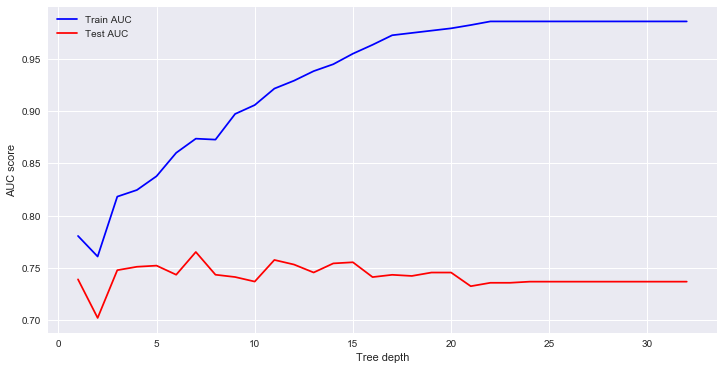

In [7]:
# Identify the optimal tree depth for given data
max_depths = np.linspace(1, 32, 32, endpoint=True)
train_results = []
test_results = []
for max_depth in max_depths:
   dt = DecisionTreeClassifier(criterion='entropy', max_depth=max_depth, random_state=SEED)
   dt.fit(X_train, y_train)
   train_pred = dt.predict(X_train)
   false_positive_rate, true_positive_rate, thresholds = roc_curve(y_train, train_pred)
   roc_auc = auc(false_positive_rate, true_positive_rate)
   # Add auc score to previous train results
   train_results.append(roc_auc)
   y_pred = dt.predict(X_test)
   false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test, y_pred)
   roc_auc = auc(false_positive_rate, true_positive_rate)
   # Add auc score to previous test results
   test_results.append(roc_auc)

plt.figure(figsize=(12,6))
plt.plot(max_depths, train_results, 'b', label='Train AUC')
plt.plot(max_depths, test_results, 'r', label='Test AUC')
plt.ylabel('AUC score')
plt.xlabel('Tree depth')
plt.legend()
plt.show()

# You observations here 
# Training error decreases with increasing tree depth - clear sign of overfitting 
# Test error increases after depth=3 - nothing more to learn from deeper trees (some fluctuations, but not stable)
# Training and test errors rise rapidly between the depths of 2 and 3
# Optimal value seen here is 3

## Minimum Sample Split

Now check for the best `min_samples_splits` parameter for our decision tree 

- Create an array for `min_sample_splits` values ranging from 0.1 - 1 with an increment of 0.1 
- In a loop, train the classifier for each `min_samples_splits` value (10 runs) 
- Calculate the training and test AUC for each run 
- Plot a graph to show under/overfitting and the optimal value 
- Interpret the results

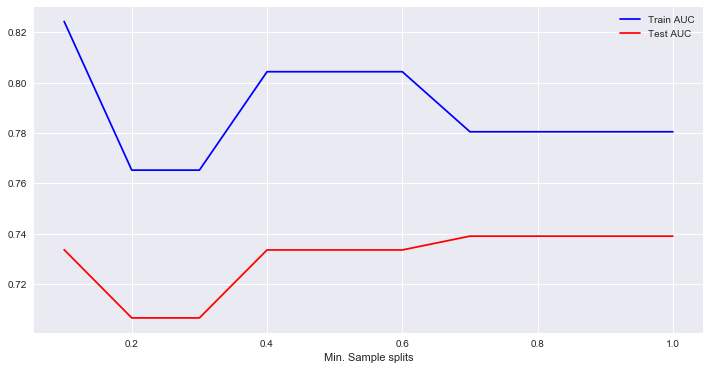

In [8]:
# Identify the optimal min-samples-split for given data
min_samples_splits = np.linspace(0.1, 1.0, 10, endpoint=True)
train_results = []
test_results = []
for min_samples_split in min_samples_splits:
   dt = DecisionTreeClassifier(criterion='entropy', min_samples_split=min_samples_split, random_state=SEED)
   dt.fit(X_train, y_train)
   train_pred = dt.predict(X_train)
   false_positive_rate, true_positive_rate, thresholds =    roc_curve(y_train, train_pred)
   roc_auc = auc(false_positive_rate, true_positive_rate)
   train_results.append(roc_auc)
   y_pred = dt.predict(X_test)
   false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test, y_pred)
   roc_auc = auc(false_positive_rate, true_positive_rate)
   test_results.append(roc_auc)

plt.figure(figsize=(12,6))
plt.plot(min_samples_splits, train_results, 'b', label='Train AUC')
plt.plot(min_samples_splits, test_results, 'r', label='Test AUC')
plt.xlabel('Min. Sample splits')
plt.legend()
plt.show()

# Your observations here
# AUC for both test and train data stabilizes at 0.7 
# Further increase in minimum sample split does not improve learning 

## Minimum Sample Leafs

Now check for the best `min_samples_leafs` parameter value for our decision tree 

- Create an array for `min_samples_leafs` values ranging from 0.1 - 0.5 with an increment of 0.1 
- In a loop, train the classifier for each `min_samples_leafs` value (5 runs) 
- Calculate the training and test AUC for each run 
- Plot a graph to show under/overfitting and the optimal value 
- Interpret the results

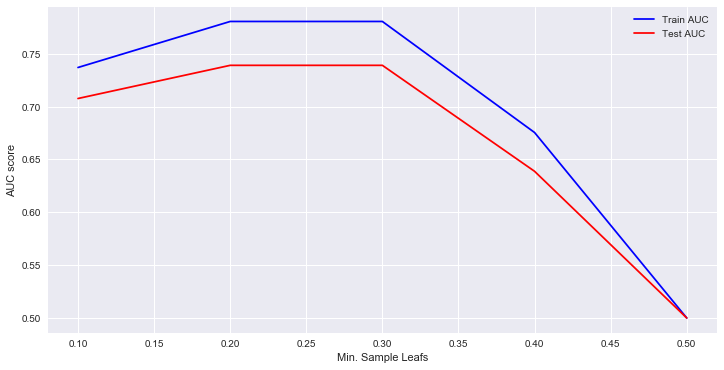

In [9]:
# Calculate the optimal value for minimum sample leafs
min_samples_leafs = np.linspace(0.1, 0.5, 5, endpoint=True)
train_results = []
test_results = []
for min_samples_leaf in min_samples_leafs:
   dt = DecisionTreeClassifier(criterion='entropy', min_samples_leaf=min_samples_leaf, random_state=SEED)
   dt.fit(X_train, y_train)
   train_pred = dt.predict(X_train)
   false_positive_rate, true_positive_rate, thresholds = roc_curve(y_train, train_pred)
   roc_auc = auc(false_positive_rate, true_positive_rate)
   train_results.append(roc_auc)
   y_pred = dt.predict(X_test)
   false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test, y_pred)
   roc_auc = auc(false_positive_rate, true_positive_rate)
   test_results.append(roc_auc)
    
plt.figure(figsize=(12,6))    
plt.plot(min_samples_leafs, train_results, 'b', label='Train AUC')
plt.plot(min_samples_leafs, test_results, 'r', label='Test AUC')
plt.ylabel('AUC score')
plt.xlabel('Min. Sample Leafs')
plt.legend()
plt.show()

# Your observations here 
# AUC gives best value between 0.2 and 0.3 for both test and training sets 
# The accuracy drops down if we continue to increase the parameter value 

## Maximum Features

Now check for the best `max_features` parameter value for our decision tree 

- Create an array for `max_features` values ranging from 1 - 12 (1 feature vs all)
- In a loop, train the classifier for each `max_features` value (12 runs) 
- Calculate the training and test AUC for each run 
- Plot a graph to show under/overfitting and the optimal value 
- Interpret the results

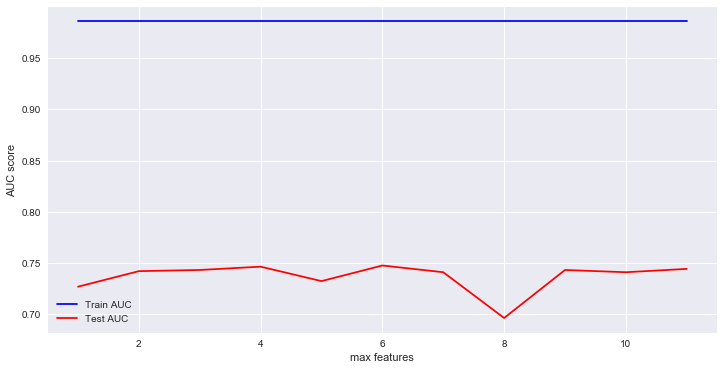

In [10]:
# Find the best value for optimal maximum feature size
max_features = list(range(1, X_train.shape[1]))
train_results = []
test_results = []
for max_feature in max_features:
   dt = DecisionTreeClassifier(criterion='entropy', max_features=max_feature, random_state=SEED)
   dt.fit(X_train, y_train)
   train_pred = dt.predict(X_train)
   false_positive_rate, true_positive_rate, thresholds = roc_curve(y_train, train_pred)
   roc_auc = auc(false_positive_rate, true_positive_rate)
   train_results.append(roc_auc)
   y_pred = dt.predict(X_test)
   false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test, y_pred)
   roc_auc = auc(false_positive_rate, true_positive_rate)
   test_results.append(roc_auc)

plt.figure(figsize=(12,6))
plt.plot(max_features, train_results, 'b', label='Train AUC')
plt.plot(max_features, test_results, 'r', label='Test AUC')
plt.ylabel('AUC score')
plt.xlabel('max features')
plt.legend()
plt.show()

# Your observations here
# No clear effect on the training dataset - flat AUC 
# Some fluctuations in test AUC but not definitive enough to make a judgement
# Highest AUC value seen at 6

## Re-train the classifier with chosen values

Now we will use the best values from each training phase above and feed it back to our classifier. Then we can see if there is any improvement in predictive performance. 

- Train the classifier with the optimal values identified 
- Compare the AUC of the new model with the earlier vanilla decision tree AUC 
- Interpret the results of the comparison

In [11]:
# Train a classifier with optimal values identified above
dt = DecisionTreeClassifier(criterion='entropy',
                           max_features=6,
                           max_depth=3,
                           min_samples_split=0.7,
                           min_samples_leaf=0.25, 
                           random_state=SEED)
dt.fit(X_train, y_train)
false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test, y_pred)
roc_auc = auc(false_positive_rate, true_positive_rate)
roc_auc

# Your observations here
# We improved the AUC from 0.73 in the vanilla classifier to 0.74 with some tuning. 
# Due to randomness, results may slightly differ, there is some improvement in most cases. 
# With more complicated (and bigger) datasets, 
# we might see an even bigger improvement in AUC/accuracy of the classifier. 

0.7443876101165104

In the next section, we shall talk about hyperparameter tuning using a technique called "grid-search" to make this process even more granular and decisive.

## Summary 
​
In this lesson, we looked at tuning a decision tree classifier in order to avoid overfitting and increasing the generalization capabilities of the classifier. For the titanic dataset, we see that identifying optimal parameter values can result in some improvements towards predictions. This idea will be exploited further in upcoming lessons and labs. 

# Regression with CART Trees

## Introduction

As we've learned, a decision tree is a supervised machine learning model that can be used both for classification and regression tasks. We have seen that a decision tree uses a tree structure to predict an output class for a given input example in a classification task. For regression analysis, each path in the tree from the root node to a leaf node represents a decision path that ends in a predicted value. In this lesson, we shall see how regression is performed in using a decision tree regressor using a simple example.  

**Note**: Kindly visit the [official documentation](https://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeRegressor.html) for the regressor tree function used in this lesson. 


## Objectives

You will be able to: 

- Explain recursive partitioning 
- Fit a decision tree regression model with scikit-learn 

## Recursive partitioning 

Linear regression is considered a __global model__ as there is a single model holding over the entire sample space. For data containing complex features with complicated and nonlinear relations, assembling such a single global model can be a very difficult and computationally expensive task. 

Another way to handle nonlinear regressions is to __partition the sample space into smaller regions__, as we have already seen in previous lessons with classification trees. This isn't much different in regression. Our goal is partition down to increasingly smaller, simpler subsets until we can fit simple regression models to them. Since each subset is a partition of a smaller subset that is itself a subset, this makes it a textbook example of **_Recursive Partioning_**.

Recall that in classification trees, the leaf nodes (the deepest nodes, or the ones at the end of each particular path) are the ones that contain the purest subsets of the data. Regression trees work a bit differently, but the general idea is still the same. With regression trees, each leaf node of the tree represents a __cell of the partition__. These cells are the smallest unit where a simple regression can be fit to the data accurately. Splitting the data still works the same way as we saw in previous lessons for classification -- we use our tree model to continuously subset down to smaller, more specific subsets until we reach a level where we can build the simplest regression model to the most specific subset in our data. For example, a regression tree may recursively partition the model down further and further until it gets all customers over the age of 50 residing in Florida with an income over \$60k/year, and then fit a simple regression model to only the data points that fit within this specific subset. 


## Simple local models

One point worth noting is that the simple regression models for each partition aren't being used as regressions in real-time. Instead, they take the sample mean of the dependent variable for that partition. Whenever the model makes a prediction, it uses this sample mean rather than calculating the actual regression model. In practice, this works quite well, and has some distinct advantages. Models are easier to interpret, and faster to use for **_inference_** (making predictions) since they are just retrieving the stored mean value rather than calculating the actual output of the regression. 

This is more easily understood when visualized. Consider the regression tree below, which predicts the price of cars based on wheelbase and horsepower:  

<img src="images/dt11.png" width=400>

Once we have created a decision tree, we can visualize the decision boundaries of that tree (assuming that the dimensionality is small enough for visualization). Notice that all the dividing lines are parallel to the axes because each internal node checks whether a single variable is above or below a given value. In simpler terms, all decision boundaries with decision trees will always be horizontal or vertical if visualized -- there are no diagonal, wavy, or curvy lines, because of the nature of the boolean (true/false) logic used by decision trees to determine the splits! 

<img src="images/dt12.png" width=400>

The tree correctly represents the interaction between Horsepower and Wheelbase, i.e. when Horsepower > 0.6, Wheelbase no longer matters. When both are equally important, the tree switches between them. 

Once we train the tree, the local models are completely understood,  so all the effort should go into finding a good partitioning of the data. 

### CART training algorithm 

In this lab, we will focus on the *CART* algorithm (Classification and Regression Trees) for *regression*. 

> The CART algorithm builds a *binary tree* in which every non-leaf node has exactly two children (corresponding to a yes/no answer). 

Given a set of training examples and their labels, the algorithm repeatedly splits the training examples $D$ into two subsets $D_{left}, D_{right}$ using some feature set $f$ and feature threshold $t_f$ such that samples with the same label are grouped together. 

At each node, the algorithm selects the split $\theta = (f, t_f)$ that produces the smallest *mean squared error* (MSE) (alternatively, we could use the mean absolute error).

So at each step, the algorithm selects the parameters $\theta$ that minimizes the following cost function:

\begin{equation}
J(D, \theta) = \frac{n_{left}}{n_{total}} MSE_{left} + \frac{n_{right}}{n_{total}} MSE_{right}
\end{equation}

- $D$: remaining training examples   
- $n_{total}$ : number of remaining training examples
- $\theta = (f, t_f)$: feature and feature threshold
- $n_{left}/n_{right}$: number of samples in the left/right subset
- $MSE_{left}/MSE_{right}$: MSE of the left/right subset

This step is repeated recursively until the *maximum allowable depth* is reached or the current number of samples $n_{total}$ drops below some minimum number. The original equations can be found [here](http://scikit-learn.org/stable/modules/tree.html).

After building the tree, new examples can be classified by navigating through the tree, testing at each node the corresponding feature until a leaf node/prediction is reached.

### Mean Squared Error (MSE)

When performing regression with CART trees (i.e. the target values are continuous) we can evaluate a split using its MSE. The MSE of node $m$ is computed as follows:

\begin{equation}
\hat{y}_m = \frac{1}{n_{m}} \sum_{i \in D_m} y_i
\end{equation}
\begin{equation}
MSE_m = \frac{1}{n_{m}} \sum_{i \in D_m} (y_i - \hat{y}_m)^2
\end{equation}

- $D_m$: training examples in node $m$
- $n_{m}$ : total number of training examples in node $m$
- $y_i$: target value of $i-$th example

Let's see the above in action with a simple experiment. We shall generate some non-linear synthetic data for our `X` and `y` attributes and fit it to a regression tree. So let's move ahead with this. In order to have a visual understanding of how this works, we shall deal with a simple regression problem between two variables `X` and `y`, where `y` is a simple function of `X` that we want to learn. Let's see this below:

## Generate data

Run the cell below to generate the data we will be using in this lesson: 

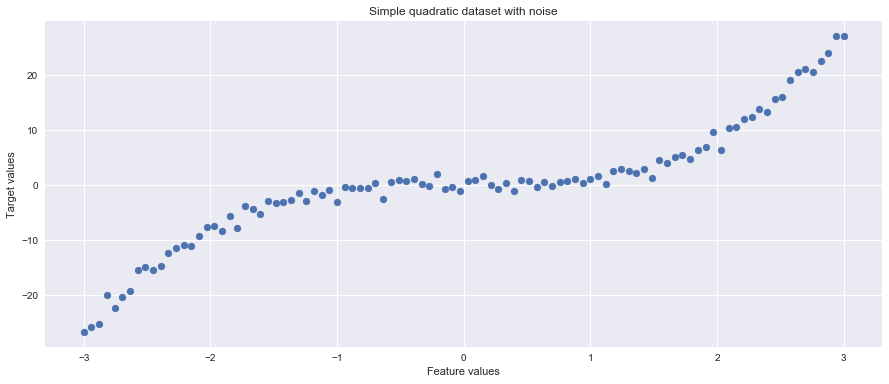

In [12]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.model_selection import train_test_split
plt.style.use('seaborn')
np.random.seed(124)

# Generate 100 examples of X and y (a simple cubic function of X) 
X = np.linspace(-3, 3, 100)
y = X ** 3 + np.random.randn(100)

# Plot the data 
plt.figure(figsize=(15,6))
plt.scatter(X, y)
plt.title("Simple quadratic dataset with noise")
plt.xlabel("Feature values")
plt.ylabel("Target values")
plt.show()

Let's now create our features and labels, and also perform a 75/25 split for the training and test sets: 

In [13]:
X = X.reshape(-1, 1)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

# Print the data dimensions
print('Shape X_train:', X_train.shape)
print('Shape y_train:', y_train.shape)
print('Shape X_test:', X_test.shape)
print('Shape y_test:', y_test.shape)

Shape X_train: (75, 1)
Shape y_train: (75,)
Shape X_test: (25, 1)
Shape y_test: (25,)


## Fit a Regression tree

You can use `DecisionTreeRegressor()` to fit a decision tree regressor in Scikit-learn. Let's create an instance of this class just like the classification tasks and fit it to data. For now, we'll set the max depth parameter to 3, as we now know that increasing this could lead to overfitting. We can experiment with different depths later. 

In [14]:
from sklearn.tree import DecisionTreeRegressor
regressor = DecisionTreeRegressor(random_state=42, max_depth=3)
regressor.fit(X_train, y_train)

DecisionTreeRegressor(criterion='mse', max_depth=3, max_features=None,
                      max_leaf_nodes=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      presort=False, random_state=42, splitter='best')

## Prediction and evaluation

The output of the cell above shows us the default values for most hyperparameters. You are encouraged to check the official documentation for this class for details on options available to you for growing regression trees! 

We can now predict labels with previously unseen data and calculate MSE. As an extra measure, we can also look at calculating the R-squared value to inspect the goodness of fit for our model. 

In [15]:
from sklearn.metrics import mean_squared_error as mse
from sklearn.metrics import r2_score

# Make predictions and evaluate 
y_pred = regressor.predict(X_test)
print('MSE score:', mse(y_test, y_pred))
print('R-sq score:', r2_score(y_test,y_pred))

MSE score: 7.651234359344747
R-sq score: 0.9134119360857194


## Visualize the model fit

Our R-squared score tells us that this appears to be a very good fit (remember $r^2$ ranges from 0 (poor) to 1 (best)). Let's visualize the learned function below with our scatter plot from earlier and see how well it fits.

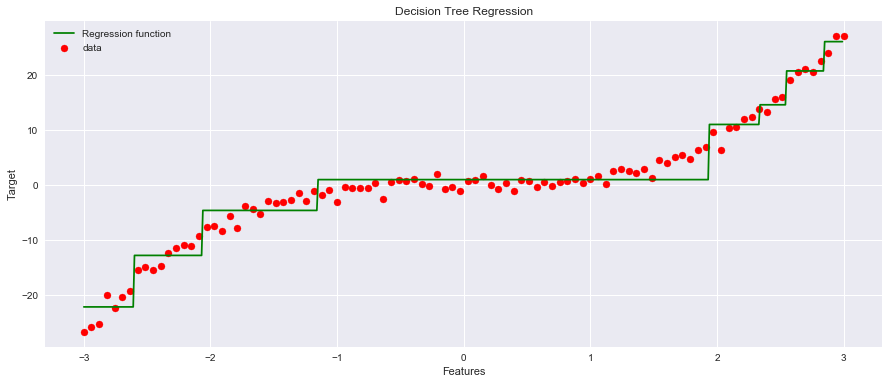

In [16]:
X_grid = np.arange(min(X), max(X), 0.01)
X_grid = X_grid.reshape((len(X_grid), 1))
plt.figure(figsize=(15,6))
plt.scatter(X, y, color = 'red', label='data')
plt.plot(X_grid, regressor.predict(X_grid), color = 'green', label='Regression function')
plt.title('Decision Tree Regression')
plt.xlabel('Features')
plt.ylabel('Target')
plt.legend()
plt.show()

We found this regression line without using any complex non-linear functions, in a fraction of time. This is the key benefit of regression trees over other regression techniques that we have seen earlier. 

### Some observations

- The function is not continuous 
- Horizontal lines are averages of all data points in sections created 
- These horizontal lines represent sections. Predictions are averages of data points in these sections. So prediction for all values from the same section will be the same 

__Try changing the `max_depth` parameter in the model and grow the tree again. The resulting visualization will clearly show you the impact of tree depth on overfitting.__

## Caveats

Without **regularization**, decision trees are likely to overfit the training examples. This can be prevented using techniques like *pruning* or by providing a maximum allowed tree depth and/or a minimum number of samples required to split a node further as we saw with classification. 

## Additional resources

- [An Introduction to Recursive Partitioning: Rationale, Application and Characteristics of Classification and Regression Trees, Bagging and Random Forests](https://www.ncbi.nlm.nih.gov/pmc/articles/PMC2927982/)
- [CART: Classification And Regression Trees for Machine Learning](https://machinelearningmastery.com/classification-and-regression-trees-for-machine-learning/)
- [Popular Decision Tree: Classification and Regression Trees (C&RT)](http://www.statsoft.com/Textbook/Classification-and-Regression-Trees)
- [Youtube: CART trees](https://www.youtube.com/watch?v=DCZ3tsQIoGU)

## Summary 

In this lesson, you learned about CART trees for regression. You looked at how the CART algorithm works, along with MSE as a loss measure which is used as a learning mechanism. You saw a simple experiment with some synthetic data where we used a tree regressor to learn a non-linear function.

# Regression with CART Trees - Lab

## Introduction

In this lab, we'll make use of what we learned in the previous lesson to build a model for the [Petrol Consumption Dataset](https://www.kaggle.com/harinir/petrol-consumption) from Kaggle. This model will be used to predict gasoline consumption for a bunch of examples, based on features about the drivers.

## Objectives

In this lab you will: 

- Fit a decision tree regression model with scikit-learn

## Import necessary libraries 

In [17]:
# Import libraries 
import pandas as pd  
import numpy as np  
from sklearn.model_selection import train_test_split 

## The dataset 

- Import the `'petrol_consumption.csv'` dataset 
- Print the first five rows of the data 
- Print the dimensions of the data 

In [18]:
# Import the dataset
dataset = pd.read_csv('petrol_consumption.csv')  

display(dataset.head(), dataset.shape)

,Petrol_tax,Average_income,Paved_Highways,Population_Driver_licence(%),Petrol_Consumption
0,9.0,3571,1976,0.525,541
1,9.0,4092,1250,0.572,524
2,9.0,3865,1586,0.580,561
3,7.5,4870,2351,0.529,414
4,8.0,4399,431,0.544,410


(48, 5)

- Print the summary statistics of all columns in the data: 

In [19]:
dataset.describe()

,Petrol_tax,Average_income,Paved_Highways,Population_Driver_licence(%),Petrol_Consumption
count,48.000000,48.000000,48.000000,48.000000,48.000000
mean,7.668333,4241.833333,5565.416667,0.570333,576.770833
std,0.950770,573.623768,3491.507166,0.055470,111.885816
min,5.000000,3063.000000,431.000000,0.451000,344.000000
25%,7.000000,3739.000000,3110.250000,0.529750,509.500000
50%,7.500000,4298.000000,4735.500000,0.564500,568.500000
75%,8.125000,4578.750000,7156.000000,0.595250,632.750000
max,10.000000,5342.000000,17782.000000,0.724000,968.000000


## Create training and test sets

- Assign the target column `'Petrol_Consumption'` to `y` 
- Assign the remaining independent variables to `X` 
- Split the data into training and test sets using a 80/20 split 
- Set the random state to 42 

In [20]:
# Split the data into training and test sets
X = dataset.drop('Petrol_Consumption', axis=1)  
y = dataset['Petrol_Consumption']  
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

## Create an instance of CART regressor and fit the data to the model 

As mentioned earlier, for a regression task we'll use a different `sklearn` class than we did for the classification task. The class we'll be using here is the `DecisionTreeRegressor` class, as opposed to the `DecisionTreeClassifier` from before.

In [21]:
# Import the DecisionTreeRegressor class 
from sklearn.tree import DecisionTreeRegressor  

# Instantiate and fit a regression tree model to training data 
regressor = DecisionTreeRegressor(random_state=42)  
regressor.fit(X_train, y_train)  

DecisionTreeRegressor(criterion='mse', max_depth=None, max_features=None,
                      max_leaf_nodes=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      presort=False, random_state=42, splitter='best')

## Make predictions and calculate the MAE, MSE, and RMSE

Use the above model to generate predictions on the test set. 

Just as with decision trees for classification, there are several commonly used metrics for evaluating the performance of our model. The most common metrics are:

* Mean Absolute Error (MAE)
* Mean Squared Error (MSE)
* Root Mean Squared Error (RMSE)

If these look familiar, it's likely because you have already seen them before -- they are common evaluation metrics for any sort of regression model, and as we can see, regressions performed with decision tree models are no exception!

Since these are common evaluation metrics, `sklearn` has functions for each of them that we can use to make our job easier. You'll find these functions inside the `metrics` module. In the cell below, calculate each of the three evaluation metrics. 

In [22]:
from sklearn.metrics import mean_absolute_error, mean_squared_error

# Make predictions on the test set
y_pred = regressor.predict(X_test) 

# Evaluate these predictions
print('Mean Absolute Error:', mean_absolute_error(y_test, y_pred))  
print('Mean Squared Error:', mean_squared_error(y_test, y_pred))  
print('Root Mean Squared Error:', np.sqrt(mean_squared_error(y_test, y_pred)))

Mean Absolute Error: 94.3
Mean Squared Error: 17347.7
Root Mean Squared Error: 131.7106677532234


## Level Up (Optional)

- Look at the hyperparameters used in the regression tree, check their value ranges in official doc and try running some optimization by growing a number of trees in a loop 

- Use a dataset that you are familiar with and run tree regression to see if you can interpret the results 

- Check for outliers, try normalization and see the impact on the output 

## Summary 

In this lesson, you implemented the architecture to train a tree regressor and predict values for unseen data. You saw that with a vanilla approach, the results were not so great, and thus we must further tune the model (what we described as hyperparameter optimization and pruning, in the case of trees). 

# Regression Trees and Model Optimization - Lab

## Introduction

In this lab, we'll see how to apply regression analysis using CART trees while making use of some hyperparameter tuning to improve our model. 

## Objectives

In this lab you will: 

- Perform the full process of cleaning data, tuning hyperparameters, creating visualizations, and evaluating decision tree models 
- Determine the optimal hyperparameters for a decision tree model and evaluate the performance of decision tree models

## Boston Housing dataset - again! 

The dataset is available in the file `'boston.csv'`. 

- Import the dataset and print its `.head()` and dimensions: 

In [24]:
# Import necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
plt.style.use('ggplot')
%matplotlib inline

# Load the Boston housing dataset
data = pd.read_csv('boston.csv', index_col=0)

# Print the first five rows
print(data.head())
print("")
# Print the dimensions of data
print(data.shape)

      crim    zn  indus  chas    nox     rm   age     dis  rad  tax  ptratio  \
1  0.00632  18.0   2.31     0  0.538  6.575  65.2  4.0900    1  296     15.3   
2  0.02731   0.0   7.07     0  0.469  6.421  78.9  4.9671    2  242     17.8   
3  0.02729   0.0   7.07     0  0.469  7.185  61.1  4.9671    2  242     17.8   
4  0.03237   0.0   2.18     0  0.458  6.998  45.8  6.0622    3  222     18.7   
5  0.06905   0.0   2.18     0  0.458  7.147  54.2  6.0622    3  222     18.7   

    black  lstat  medv  
1  396.90   4.98  24.0  
2  396.90   9.14  21.6  
3  392.83   4.03  34.7  
4  394.63   2.94  33.4  
5  396.90   5.33  36.2  

(506, 14)


## Identify features and target data 

In this lab, we will use three features from the Boston housing dataset: `'RM'`, `'LSTAT'`, and `'PTRATIO'`: 

#### Features
- `'RM'` is the average number of rooms among homes in the neighborhood 
- `'LSTAT'` is the percentage of homeowners in the neighborhood considered "lower class" (working poor) 
- `'PTRATIO'` is the ratio of students to teachers in primary and secondary schools in the neighborhood 

#### Target
- `MEDV`',the median value of the home 

- Create DataFrames for the features and the target variable as shown above 
- Inspect the contents for validity 

In [25]:
# Features and target data
target = data['medv']
features = data[['rm', 'lstat', 'ptratio']]
print(data.medv.describe())
print("")
print(features.head())

count    506.000000
mean      22.532806
std        9.197104
min        5.000000
25%       17.025000
50%       21.200000
75%       25.000000
max       50.000000
Name: medv, dtype: float64

      rm  lstat  ptratio
1  6.575   4.98     15.3
2  6.421   9.14     17.8
3  7.185   4.03     17.8
4  6.998   2.94     18.7
5  7.147   5.33     18.7


## Inspect correlations 

- Use scatter plots to show the correlation between the chosen features and the target variable
- Comment on each scatter plot 

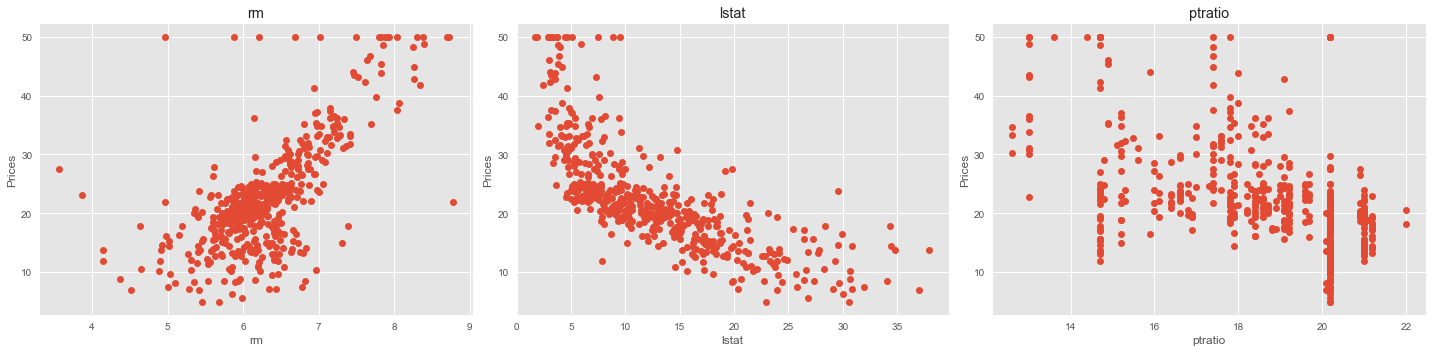

In [26]:
# Your code here 
# Create scatter plots for each feature vs. target
import matplotlib.pyplot as plt
plt.figure(figsize=(20, 5))
for i, col in enumerate(features.columns):
    plt.subplot(1, 3, i+1)
    plt.plot(data[col], target, 'o')
    plt.title(col)
    plt.xlabel(col)
    plt.ylabel('Prices')
    plt.tight_layout()

## Create evaluation metrics

- Import `r2_score` and `mean_squared_error` from `sklearn.metrics` 
- Create a function `performance(true, predicted)` to calculate and return the r-squared score and MSE for two equal-sized arrays for the given true and predicted values 

In [27]:
# Import metrics
from sklearn.metrics import r2_score, mean_squared_error 

# Define the function
def performance(y_true, y_predict):
    """ Calculates and returns the performance score between 
        true and predicted values based on the metric chosen. """
    
    # Calculate the r2 score between 'y_true' and 'y_predict'
    r2 = r2_score(y_true, y_predict)
    
    # Calculate the mean squared error between 'y_true' and 'y_predict'
    mse = mean_squared_error(y_true, y_predict)
    
    # Return the score
    return [r2, mse]

# Test the function
score = performance([3, -0.5, 2, 7, 4.2], [2.5, 0.0, 2.1, 7.8, 5.3])
score
# [0.9228556485355649, 0.4719999999999998]

[0.9228556485355649, 0.4719999999999998]

## Split the data into training and test sets

- Split `features` and `target` datasets into training/test data (80/20) 
- For reproducibility, use `random_state=42`

In [28]:
from sklearn.model_selection import train_test_split 

# Split the data into training and test subsets
x_train, x_test, y_train, y_test = train_test_split(features, target, test_size=0.2, random_state=42)

## Grow a vanilla regression tree

- Import the `DecisionTreeRegressor` class
- Run a baseline model for later comparison using the datasets created above
- Generate predictions for test dataset and calculate the performance measures using the function created above 
- Use `random_state=45` for tree instance
- Record your observations

In [29]:
# Import DecisionTreeRegressor
from sklearn.tree import DecisionTreeRegressor

# Instantiate DecisionTreeRegressor 
regressor = DecisionTreeRegressor(random_state=45)

# Fit the model to training data
regressor.fit(x_train, y_train)

# Make predictions on the test data
y_pred = regressor.predict(x_test)

# Calculate performance using the performance() function 
score = performance(y_test, y_pred)
score

# [0.47097115950374013, 38.795686274509805]  - R2, MSE

[0.47097115950374013, 38.795686274509805]

## Hyperparameter tuning (I)

- Find the best tree depth using depth range: 1-30
- Run the regressor repeatedly in a `for` loop for each depth value  
- Use `random_state=45` for reproducibility
- Calculate MSE and r-squared for each run 
- Plot both performance measures for all runs 
- Comment on the output 

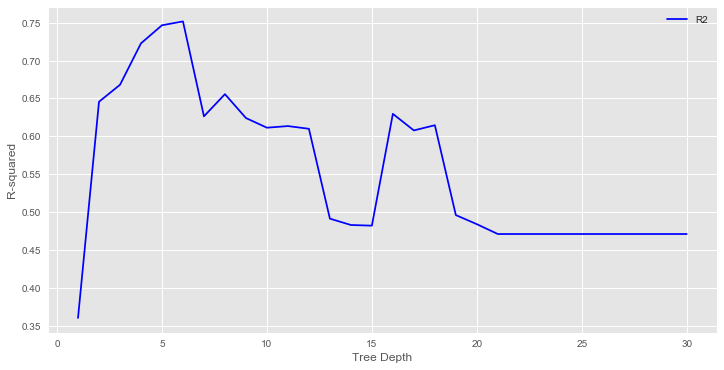

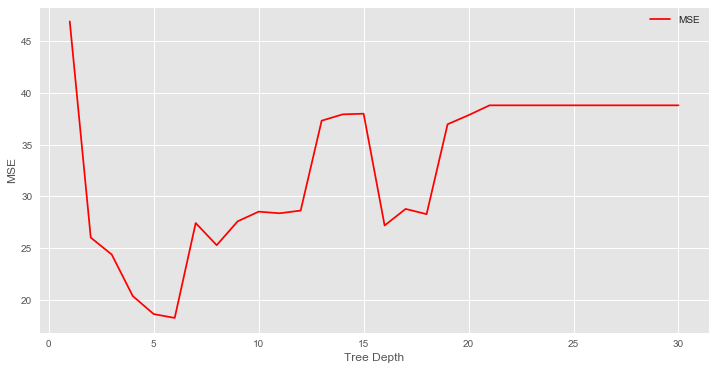

In [30]:
# Identify the optimal tree depth for given data
max_depths = np.linspace(1, 30, 30, endpoint=True)
mse_results = []
r2_results = []

for max_depth in max_depths:
    regressor = DecisionTreeRegressor(max_depth=max_depth, random_state=45)
    regressor.fit(x_train, y_train)
    y_pred = regressor.predict(x_test)
    score = performance(y_test, y_pred)
    r2_results.append(score[0])
    mse_results.append(score[1])

plt.figure(figsize=(12, 6))
plt.plot(max_depths, r2_results, 'b', label='R2')
plt.xlabel('Tree Depth')
plt.ylabel('R-squared')
plt.legend()
plt.show()
plt.figure(figsize=(12, 6))
plt.plot(max_depths, mse_results, 'r', label='MSE')
plt.xlabel('Tree Depth')
plt.ylabel('MSE')
plt.legend()
plt.show()

## Hyperparameter tuning (II)

- Repeat the above process for `min_samples_split` 
- Use a range of values from 2-10 for this hyperparameter 
- Use `random_state=45` for reproducibility
- Visualize the output and comment on results as above 

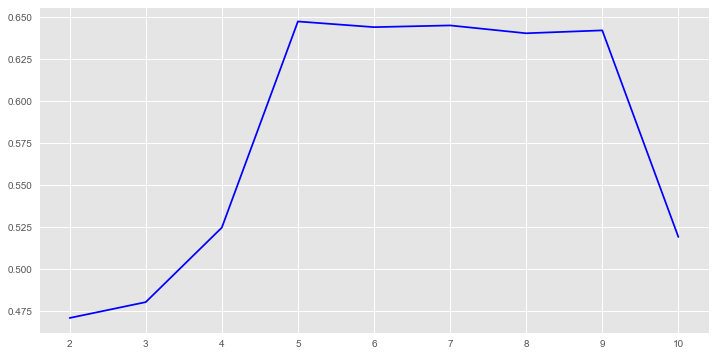

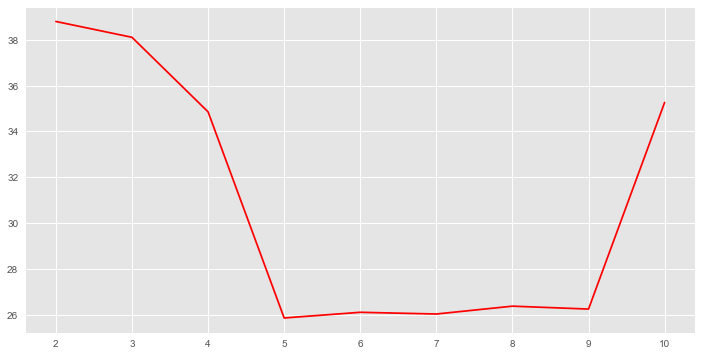

In [31]:
# Identify the optimal minimum split size for given data
min_samples_splits = np.arange(2, 11)
mse_results = []
r2_results = []

for min_samples_split in min_samples_splits:
    regressor = DecisionTreeRegressor(min_samples_split=int(min_samples_split), random_state=45)
    regressor.fit(x_train, y_train)
    y_pred = regressor.predict(x_test)
    score = performance(y_test, y_pred)
    r2_results.append(score[0])
    mse_results.append(score[1])

plt.figure(figsize=(12, 6))
plt.plot(min_samples_splits, r2_results, 'b', label='R2')
plt.show()
plt.figure(figsize=(12, 6))
plt.plot(min_samples_splits, mse_results, 'r', label='MSE')
plt.show()

# Run the *optimized* model 

- Use the best values for `max_depth` and `min_samples_split` found in previous runs and run an optimized model with these values 
- Calculate the performance and comment on the output 

In [32]:
regressor = DecisionTreeRegressor(min_samples_split=5, max_depth=6, random_state=45)
regressor.fit(x_train, y_train)
y_pred = regressor.predict(x_test)
score = performance(y_test, y_pred)
score[0], score[1], regressor

(0.7515894043185498,
 18.216888758430127,
 DecisionTreeRegressor(criterion='mse', max_depth=6, max_features=None,
                       max_leaf_nodes=None, min_impurity_decrease=0.0,
                       min_impurity_split=None, min_samples_leaf=1,
                       min_samples_split=5, min_weight_fraction_leaf=0.0,
                       presort=False, random_state=45, splitter='best'))

## Level up (Optional)

- How about bringing in some more features from the original dataset which may be good predictors?
- Also, try tuning more hyperparameters like max-features to find a more optimal version of the model 

## Summary 

In this lab, we looked at applying a decision-tree-based regression analysis on the Boston Housing dataset. We saw how to train various models to find the optimal values for hyperparameters. 

# Decision Trees - Recap


## Key Takeaways

The key takeaways from this section include:

* Decision trees can be used for both categorization and regression tasks
* They are a powerful and interpretable technique for many machine learning problems (especially when combined with ensemble methods)
* Decision trees are a form of Directed Acyclic Graphs (DAGs) - you traverse them in a specified direction, and there are no "loops" in the graphs to go backward
* Algorithms for generating decision trees are designed to maximize the information gain from each split
* A popular algorithm for generating decision trees is ID3 - the Iterative Dichotomiser 3 algorithm
* There are several hyperparameters for decision trees to reduce overfitting - including maximum depth, minimum samples to split a node that is currently a leaf, minimum leaf sample size, maximum leaf nodes, and maximum features 